In [12]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr)

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
# read_rmsp()

0:00:00.002 ₀╷₀₀╷₀₀.₀₀₂ init()


,1,2,3,4,5,6,7,8,9,10
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__
1,__spec__,_log,_o,adds,datetime,df_info,dfr,disp,display,draw_l
2,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math
3,merge_OKVED,np,os,pd,read_rmsp,reload,requests,shutil,sizeof_fmt,start
4,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile,-,-,-


,name,rows,cols,memory,keys
0,'fact',143,14,"16,159",14
1,'predict',143,26,"29,887",26
2,'full_data',156,41,"52,416",41


In [17]:
# class Struct:
#     def __init__(self, **entries):
#         self.__dict__.update(entries)

# def draw_l (**kwargs):
#     print (kwargs.items())
#     s = Struct(**kwargs)
#     d = {}
    
#     for key, value in kwargs.items():
#         print("{} = {}".format(key, value))

#         # print("{} = {}".format(key, value))
#     print (s.color)    

In [2]:
import sys
sys.path.append('settings/')
import ftps

ftps = reload(ftps)
ftps
ftps.reg
locals().update(ftps.reg)


'31.31.196.98'

In [3]:
yandex_weather_cols = {
    "now": 1641137402,
    "now_dt": "2022-01-02T15:30:02.853873Z",
    "info": {"url": "https://yandex.ru/pogoda/213?lat=55.692\u0026lon=37.347", "lat": 55.692, "lon": 37.347},
    "fact": {
        "obs_time": 1641135600,
        "temp": -8,
        "feels_like": -12,
        "icon": "ovc",
        "condition": "overcast",
        "wind_speed": 1,
        "wind_dir": "w",
        "pressure_mm": 742,
        "pressure_pa": 989,
        "humidity": 83,
        "daytime": "n",
        "polar": False,
        "season": "winter",
        "wind_gust": 6.6
    },
    "forecast": {
        "date": "2022-01-03",
        "date_ts": 1641157200,
        "week": 1,
        "sunrise": "08:59",
        "sunset": "16:10",
        "moon_code": 8,
        "moon_text": "moon-code-8",
        "parts": [{
            "part_name": "night",
            "temp_min": -12,
            "temp_avg": -12,
            "temp_max": -10,
            "wind_speed": 1.9,
            "wind_gust": 3.6,
            "wind_dir": "sw",
            "pressure_mm": 741,
            "pressure_pa": 987,
            "humidity": 86,
            "prec_mm": 0,
            "prec_prob": 0,
            "prec_period": 360,
            "icon": "bkn_n",
            "condition": "cloudy",
            "feels_like": -17,
            "daytime": "n",
            "polar": False
        }, {
            "part_name": "morning",
            "temp_min": -11,
            "temp_avg": -10,
            "temp_max": -9,
            "wind_speed": 2.3,
            "wind_gust": 4.8,
            "wind_dir": "s",
            "pressure_mm": 738,
            "pressure_pa": 983,
            "humidity": 87,
            "prec_mm": 0.3,
            "prec_prob": 30,
            "prec_period": 360,
            "icon": "ovc_-sn",
            "condition": "light-snow",
            "feels_like": -15,
            "daytime": "d",
            "polar": False
        }]
    }
}

print (yandex_weather_cols['forecast']['parts'][0].keys())

dict_keys(['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity', 'prec_mm', 'prec_prob', 'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar'])


In [4]:
level_1 = ['now', 'now_dt', 'info', 'fact', 'forecast']
fact_cols = ['obs_time', 'temp', 'feels_like', 'icon', 'condition', 
        'wind_speed', 'wind_dir', 'pressure_mm', 'pressure_pa', 
        'humidity', 'daytime', 'polar', 'season', 'wind_gust']

forecast = ['date', 'date_ts', 'week', 'sunrise', 'sunset', 'moon_code', 'moon_text', 'parts']
forecast_info =  ['date', 'date_ts', 'week', 'sunrise', 'sunset', 'moon_code', 'moon_text', 'parts']
forecast_info_parts = ['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 
                  'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity', 'prec_mm', 'prec_prob', 
                  'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar']

predict = ['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity',
            'prec_mm', 'prec_prob', 'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar']

In [20]:
dfr['full_data'].shape

(145, 41)

{'server': '31.31.196.98', 'username': 'u1371051_gpxlabd', 'password': 'Lab_1054@Data2022'}
0:28:16.845 ₁╷₄₄╷₃₇.₃₀₂ 02. read_weather_from() defined
0:00:00.002 ₁╷₄₄╷₃₇.₃₀₄ 03. annot_max() defined 


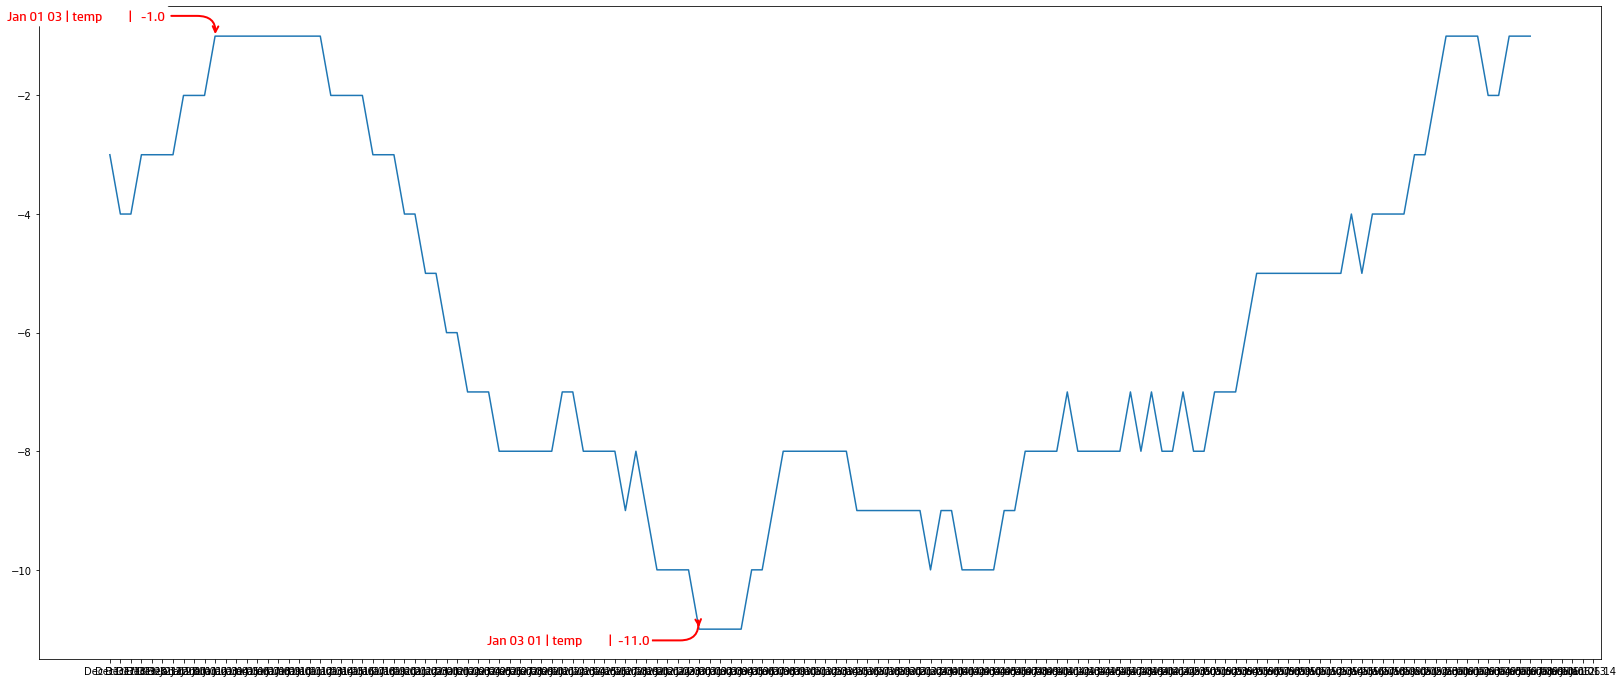

In [22]:
from ftplib import FTP
import json

import pandas as pd
import sys
sys.path.append('settings/')
import ftps
ftps = reload(ftps)
global buff 
global annotation_shift
annotation_shift = 0

locals().update(ftps.clock_ftp)

print (ftps.clock_ftp)

def read_weather_from ():
    filename = r"www/gpxlab.ru/api/cache_clock/json_yandex_weather_history.json"
    # Just one of the files;
    
    

    ftp = FTP(server)
    
    ftp.login(user = username, passwd = password)
#     ftp.cwd("/www/gpxlab.ru/api/cache_clock/")

    filename = r"json_yandex_weather_history_tmp.json"

    with open(filename, "wb") as file:
        ftp.retrbinary('RETR json_yandex_weather_history.json', file.write)

    file = open(filename, "r")
    buff = file.read()
    

    file.close()
    ftp.quit()
    
    weather_JSON = json.loads("{"+buff[:-2]+"}")
    
    weather_fact=[]
    weather_predict = []

    for l in list(weather_JSON.items()): #[:100]:
        t,ob = l
        
#         print (ob['fact'])
        
        weather_fact.append(ob['fact'])
        
        jsonString_merged  = {**{'obs_time': ob['fact']['obs_time'] + 12*60*60 },**ob['forecast'], **ob['forecast']['parts'][1]}
        del jsonString_merged['parts']
        
        weather_predict.append(jsonString_merged)

    # df = pd.json_normalize(weather_JSON['now'])
    
    dfr['fact'] = pd.DataFrame(weather_fact, columns=fact_cols)   
    dfr['fact'].drop_duplicates(subset=['obs_time'],inplace=True)
    
    dfr['predict'] = pd.DataFrame(weather_predict)
    dfr['predict'].drop_duplicates(subset=['obs_time'],inplace=True)    
    
    dfr['predict'].columns =  dfr['predict'].columns.values + '_predict'
    
    
    df = pd.merge(dfr['fact'], dfr['predict'], left_on = 'obs_time', right_on = 'obs_time_predict', how='outer' )

#     df = pd.concat([dfr['fact'], dfr['predict']] )
    
    
    df['obs_time'].fillna(df['obs_time_predict'], inplace=True)
    
    df = df.sort_values(['obs_time'], ascending=True)    
    df['temp_predict'] = df['temp_avg_predict'] 
    
    dfr['full_data'] = df

    return df
  
df = read_weather_from ()
# df['t'] = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in df['obs_time']]
# df
# Do some other logic not relevant to the question

tm('02. read_weather_from() defined')

def annot_max(param):
    
    global  annotation_shift
    
    annotation_shift += 1
    
    (x,y,k,color,ax) = param
    
    xmax = x[np.argmax(y)]
    ymax = y.max()

    
    ylast = y.iloc[-1]
    
    if(np.isnan(ylast) != True):
        ax.annotate(ylast, xy=(1,ylast), xytext=(6,0), color=color, 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

  
    text= "x={:.3s}, y={:.3f}".format(xmax, float(ymax))
    text= "%s | %s | %s"%(xmax[:], k.ljust(12),   str(ymax).rjust(6))
    
    
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec=color, lw=0, color=color, zorder=100)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=85,rad=20", color=color, lw=2, shrinkA=2)
    kw = dict(xycoords='data',textcoords='offset points',
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="bottom", color=color)
    
#     ax.annotate(text, xy=(xmax, ymax), xytext=(0.5, 1.0 - annotation_shift), **kw, family='HP Simplified', fontsize=14)

    ax.annotate(text, xy=(xmax, ymax),  xytext=(-50, 0 + annotation_shift*14 ), **kw, family='HP Simplified', fontsize=14)
    
#     ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
    
    xmax = x[np.argmin(y)]
    ymax = y.min()
    
  
    text= "x={:.3s}, y={:.3f}".format(xmax, float(ymax))
    text= "%s | %s | %s"%(xmax[0:], k.ljust(12),   str(ymax).rjust(6))
    
    
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.2", fc="w", ec=color, lw=0.0, color=color)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=95,rad=20", color=color, lw=2, shrinkA=0.4)
    kw = dict(xycoords='data',textcoords='offset points',
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", color=color)
    ax.annotate(text, xy=(xmax, ymax), xytext=(-50, 10 - annotation_shift*15), **kw, family='HP Simplified', fontsize=14 )
    
tm('03. annot_max() defined ')   

# ****************  test block
# (x,df[k],k,p.color,ax[k] )

fig,ax1  = plt.subplots()

tdf = dfr['full_data'][10:300]

x = [datetime.utcfromtimestamp(ts).strftime('%b %d %H') for ts in tdf['obs_time']]

ax1.plot(x,tdf['temp'])

annot_max((x,tdf['temp'],'temp','r',ax1))

plt.show()

    
#     https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

*** Start at: 09:56:49 ₂₀₂₂₋₀₁₋₀₆  ************************************************************
146
1 (99, 41)


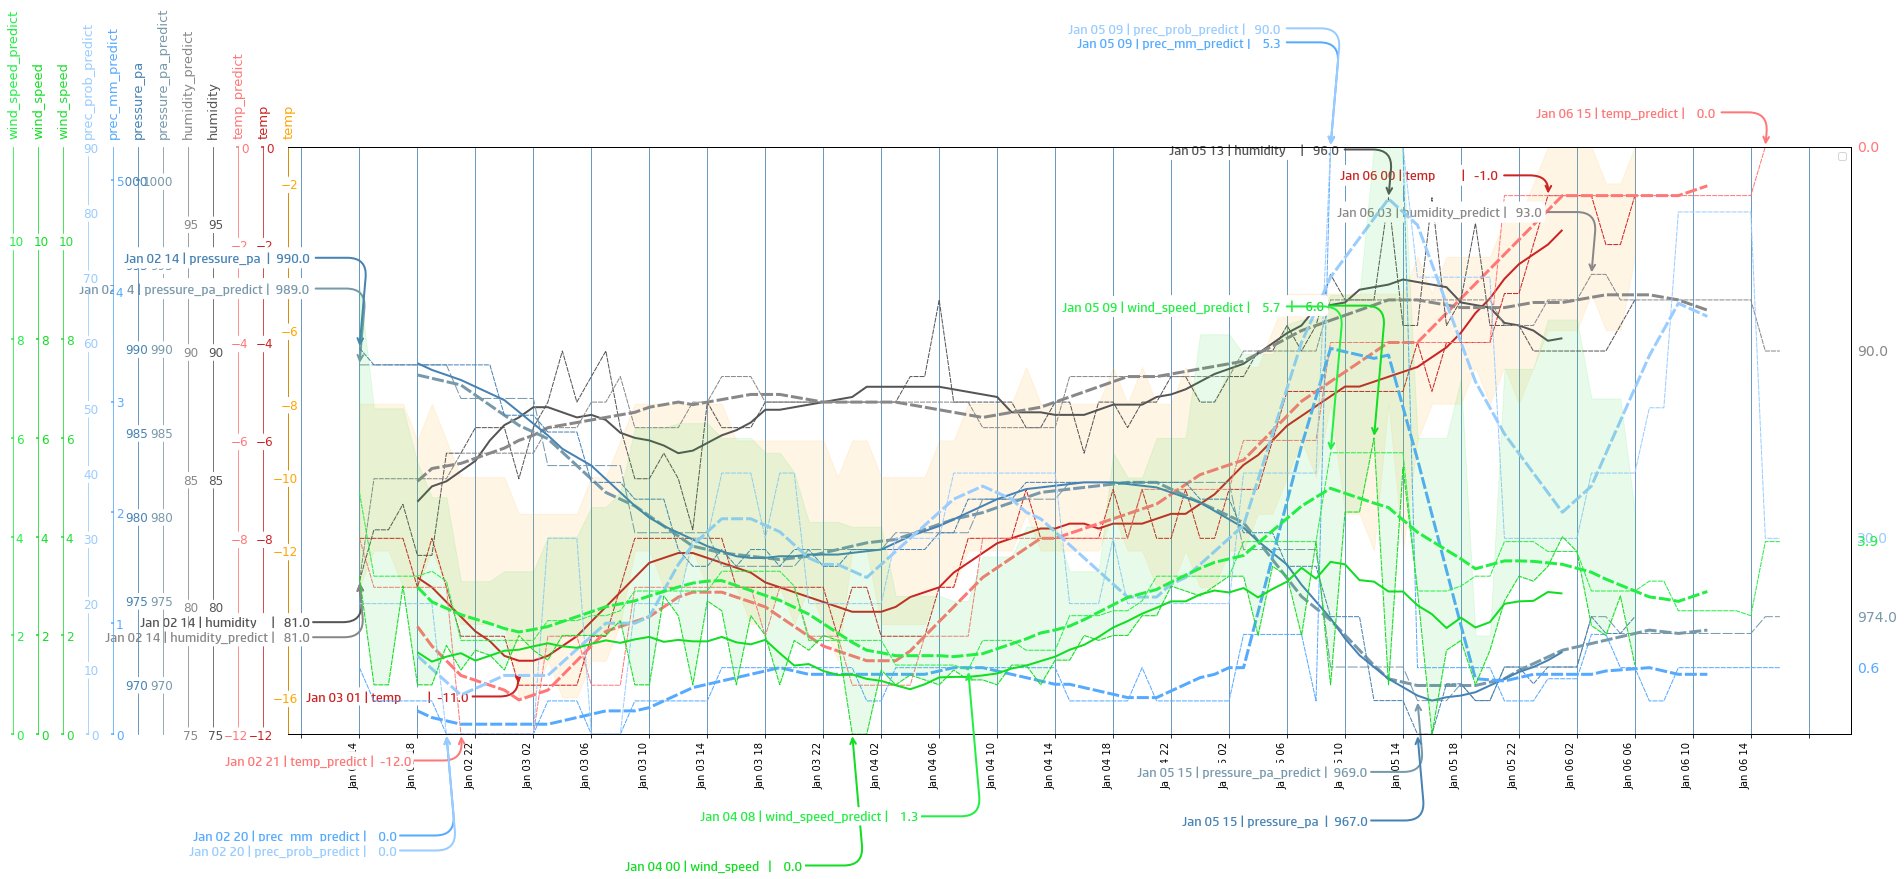

2 (99, 41)
3 (99, 41)
4 (99, 41)
5 (99, 41)
6 (99, 41)
7 (99, 41)
8 (99, 41)
9 (99, 41)
10 (99, 41)
11 (99, 41)
12 (99, 41)
13 (99, 41)
14 (99, 41)
15 (99, 41)
16 (99, 41)
17 (99, 41)
18 (99, 41)
19 (99, 41)
20 (99, 41)
21 (99, 41)
22 (99, 41)
23 (99, 41)
24 (99, 41)
25 (99, 41)
26 (99, 41)
27 (99, 41)
28 (99, 41)
29 (99, 41)
30 (99, 41)
31 (99, 41)
32 (99, 41)
33 (99, 41)
34 (99, 41)
35 (99, 41)
36 (99, 41)
37 (99, 41)
38 (99, 41)
39 (99, 41)
40 (99, 41)
41 (99, 41)
42 (99, 41)
43 (99, 41)
44 (99, 41)
45 (99, 41)
46 (99, 41)
47 (99, 41)
48 (99, 41)
49 (99, 41)
50 (99, 41)
51 (99, 41)
52 (99, 41)
53 (99, 41)
54 (99, 41)
55 (99, 41)
56 (99, 41)
57 (98, 41)
58 (97, 41)
59 (96, 41)
60 (95, 41)
61 (94, 41)
62 (93, 41)
63 (92, 41)
64 (91, 41)
65 (90, 41)
66 (89, 41)
67 (88, 41)
68 (87, 41)
69 (86, 41)
70 (85, 41)
71 (84, 41)
72 (83, 41)
73 (82, 41)
74 (81, 41)
75 (80, 41)
76 (79, 41)
77 (78, 41)
78 (77, 41)
79 (76, 41)
80 (75, 41)
81 (74, 41)
82 (73, 41)
83 (72, 41)
84 (71, 41)
85 (70, 41)


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == -11.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 87.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 999.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 0.6 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:6

144 (12, 41)


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == -11.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 87.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 999.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 0.6 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:6

145 (11, 41)


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == -11.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 87.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 999.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 0.6 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:6

146 (10, 41)


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == -11.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 87.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 999.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:69: UserWarning: Attempting to set identical bottom == top == 0.6 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_14244/3464060995.py:6

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [13]:


pd.options.mode.chained_assignment = None

tm()


def plot_draw(t_shift = 1):
    
   
    df = read_weather_from()[-100-t_shift:-t_shift-1]
    
    dfn = dfr['full_data']
    
    print(t_shift, df.shape)

    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams["figure.figsize"] = (28,12)

    fig,ax1  = plt.subplots()
    fig.patch.set_facecolor('white')


    cols =['obs_time', 'temp', 'feels_like', 'icon', 'condition', 
            'wind_speed', 'wind_dir', 'pressure_mm', 'pressure_pa', 
            'humidity', 'daytime', 'polar', 'season', 'wind_gust']

    global ax, ax_shift,annotation_shift,annotations,legend
    annotations = []
    ax = {}
    legend = {}

    ax_shift = 0 
    annotation_shift = 0



    x = [datetime.utcfromtimestamp(ts).strftime('%b %d %H') for ts in df['obs_time']]



    loc = plticker.MultipleLocator(base=4.0)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%Y %H:%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gcf().autofmt_xdate()


    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='y', rotation=90, color='w')
    ax1.get_yaxis().set_visible(False)

    ax1.grid(color='steelblue')



    def draw_line (**kwargs):

        global ax_shift,annotation_shift,annotations, ax, legend

        p= Struct(**kwargs)
        k = p.data_key

        ax[k] = ax1.twinx()
        ax[k].xaxis.set_major_locator(loc)

        y_max = p.max_y if hasattr(p, 'max_y') else df[k].max()
        y_min = p.min_y if hasattr(p, 'min_y') else df[k].min()

        ax[k].set_ylim([y_min, y_max])

        ax[k].spines['left'].set_position(("axes", ax_shift))
        ax[k].spines['left'].set_color(p.color)    
        ax[k].yaxis.set_label_coords(ax_shift,1.02)

        ax[k].set_ylabel('Example', fontsize=13, horizontalalignment='left', zorder=100,  position=(ax_shift-0.004,1.015))

    #     ax[k].yaxis.set_ticks_position('left')
        ax[k].yaxis.tick_left()
        ax[k].yaxis.set_tick_params(width=5)
        ax[k].tick_params(axis='y', direction='inout', pad = -12, length=16, width=10, labelsize = 12, labelrotation =0 )


        bbox = dict(boxstyle="round",  pad=0.1, ec="w", fc="w", alpha=1)
        plt.setp(ax[k].get_yticklabels(), bbox=bbox)

        ax_shift -= .016


        ax[k].yaxis.label.set_color(p.color)
        ax[k].set_ylabel(k)

        tkw = dict(size=4, width=1.5)
        ax[k].tick_params(axis='y', colors=p.color, **tkw)

        if p.plot_type == 'fill' :
    #         ax[k].fill_between(x, df[k], where=(df[k] > -30), color=p.color, alpha=p.alfa)
            ax[k].fill_between(x, df[k], df[p.fill_k] , color=p.color, alpha=p.alfa)

    #         legend[k] = k
        else:
            legend[k] = k
            ax[k].plot(x,df[k], color=p.color, linewidth=p.linewidth, linestyle=p.linestyle, 
                       dashes= p.dashes if hasattr(p, 'dashes') else (5,1), 
                       marker=p.marker)
            annotations.append( (x,df[k],k,p.color,ax[k] ))

        if hasattr(p, 'rolling_avg') :
            
            df.loc[:,k+'_mean'] = df[k].rolling(window=10).mean().shift(-5)            
            
            [lw,ls,dash,min_max_k] = [3,':',(4, 1),[k.replace('_predict','') if k.replace('_predict','') in dfn.keys() else k ,k]] if 'pred' in k else [2,'-',(1, 0),[k+'_predict',k]]
            
            y_max = p.max_y if hasattr(p, 'max_y') else dfn[min_max_k].max().max()
            y_min = p.min_y if hasattr(p, 'min_y') else dfn[min_max_k].min().min()
    
            ax[k].plot(x,df[k+'_mean'], color=p.color, linewidth=lw, linestyle=ls, dashes=dash, marker=p.marker)
            ax[k].set_ylim([y_min, y_max])


    
    temp_max = dfn[['feels_like','temp']].max().max()
    temp_min = dfn[['feels_like','temp']].min().min()

    draw_line(data_key = 'temp',            plot_type='fill', color="orange",  linewidth=2, alfa=.1, linestyle='-', marker='', 
             max_y=temp_max, min_y=temp_min, fill_k = 'feels_like')


    draw_line(data_key = 'temp', plot_type='line', 
              color="#c22",  linewidth=1, alfa=.3, linestyle=':', marker='', rolling_avg = True)

    draw_line(data_key = 'temp_predict', plot_type='line', 
              color="#f77", linewidth=1, alfa=.3, linestyle='-', marker='',  rolling_avg = True)


    draw_line(data_key = 'humidity',     plot_type='line', 
              color="#555", linewidth=1, alfa=.3, linestyle=':',   marker='',  rolling_avg = True )

    draw_line(data_key = 'humidity_predict',     plot_type='line', 
              color="#888", linewidth=1, alfa=.3, linestyle='-',  marker='',   rolling_avg = True )


    draw_line(data_key = 'pressure_pa_predict',  plot_type='line', color="#7799aa", linewidth=1, alfa=.3, linestyle='--', marker='', dashes=(10,2),
              rolling_avg = True)

    draw_line(data_key = 'pressure_pa',     plot_type='line', color="steelblue", linewidth=1, alfa=.3, linestyle='-', marker='',
              rolling_avg = True)

    
    draw_line(data_key = 'prec_mm_predict',     plot_type='line', color="#55aaff", linewidth=1, alfa=.4, linestyle='-', marker='',
              rolling_avg = True)
    
    draw_line(data_key = 'prec_prob_predict',     plot_type='line', color="#99ccff", linewidth=1, alfa=.4, linestyle='-', marker='',
              rolling_avg = True)
    
    

    wind_min = dfn[['wind_gust','wind_speed']].min().min()
    wind_max = dfn[['wind_gust','wind_speed']].max().max()


    draw_line(data_key = 'wind_speed',      plot_type='fill', color="#22dd33",  linewidth=1, alfa=.1, linestyle='--', marker='', 
              max_y=wind_max, min_y=wind_min,  fill_k = 'wind_gust')  

    draw_line(data_key = 'wind_speed',      plot_type='line', color="#11dd22",   linewidth=1, alfa=.3, linestyle='--', marker='',
              max_y=wind_max, min_y=wind_min,  
              rolling_avg = True
             ) 
    
    draw_line(data_key = 'wind_speed_predict',      plot_type='line', color="#22ee44",   linewidth=1, alfa=.3, linestyle='--', marker='',
              max_y=wind_max, min_y=wind_min,  
              rolling_avg = True
             ) 
    
    ax1.legend([l for l in legend])

    [annot_max(a) for a in annotations]
   
    if t_shift < 2:
        plt.show() 
   
    fname = str(t_shift).rjust(3,'0') + '.ywf_' +strftime("%Y-%m-%d %H-%M", gmtime())[:-9]

    fig.savefig('plt/anim/'+fname+'.png', bbox_inches='tight')  
    fig.savefig('plt/temp.png', bbox_inches='tight')  

    fig.clear()
    plt.close(fig)
    

file_range = dfr['full_data'].shape[0] - 10

[plot_draw(i+1) for i in range(file_range)] #